Осуществить предварительную обработку результатов наблюдений (парная выборка (xi; yi) объёма 50), <br>
включающую построение диаграммы рассеивания; <br>
группировку данных; <br>
оценку числовых характеристик для негруппированных и группированных данных;

 Исходная выборка
    X     Y
[[-1.58  6.66]
 [-0.77 11.45]
 [-0.04  5.26]
 [ 0.2   6.61]
 [ 0.61 11.92]
 [ 0.9  17.31]
 [ 0.96  8.37]
 [ 1.01 10.24]
 [ 1.01  5.17]
 [ 1.62  5.32]
 [ 2.09  4.43]
 [ 2.17 13.24]
 [ 2.42  5.47]
 [ 2.48 17.07]
 [ 2.55  6.05]
 [ 2.69  6.56]
 [ 2.69 12.63]
 [ 2.87 10.68]
 [ 3.03 22.56]
 [ 3.12 11.32]
 [ 3.29 23.02]
 [ 3.63 19.67]
 [ 4.27 15.35]
 [ 4.41 21.89]
 [ 4.66 14.96]
 [ 4.66 22.3 ]
 [ 4.76 21.44]
 [ 4.76  7.82]
 [ 4.8  29.13]
 [ 5.01 11.6 ]
 [ 5.15 21.54]
 [ 5.92 28.54]
 [ 6.05 15.46]
 [ 6.07 32.18]
 [ 6.28 23.97]
 [ 6.3  21.63]
 [ 7.02 30.78]
 [ 7.07 21.34]
 [ 7.26 23.93]
 [ 7.53 15.25]
 [ 7.61 24.42]
 [ 7.81 12.04]
 [ 8.23 30.34]
 [ 8.23 30.34]
 [ 9.84 28.98]
 [10.45 24.72]
 [10.66 14.87]
 [10.68 29.12]
 [11.25 29.38]
 [11.28 28.59]]


<Axes: >

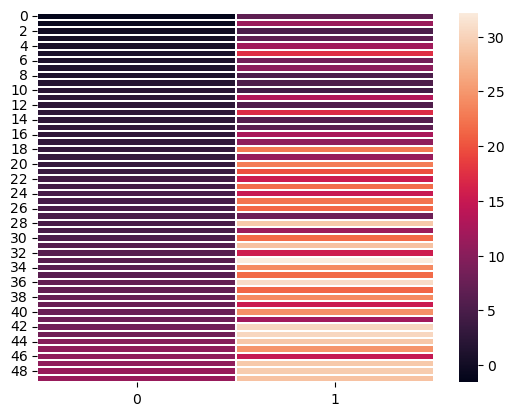

In [271]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.stats
import seaborn as sns

from scipy.stats import linregress
from scipy.stats import pearsonr
from scipy.stats import t

X = [0.2, 7.07, 0.96, 7.26, 2.48,
    4.41, 10.66, 4.8, 2.17, 3.29,
    4.27, 0.61, 6.05, 2.69, 11.28,
    4.76, 4.66, 2.42, 1.01, 5.15,
    -0.77, 2.09, 7.61, 2.55, 7.53,
    10.68, 3.12, 2.87, 3.03, -0.04,
    -1.58, 11.25, 1.01, 7.02, 8.23,
    8.23, 3.63, 10.45, 5.01, 9.84,
    6.07, 0.9, 2.69, 5.92, 4.76,
    1.62, 7.81, 6.28, 6.3, 4.66]

Y = [6.61, 21.34, 8.37, 23.93, 17.07,
    21.89, 14.87, 29.13, 13.24, 23.02,
    15.35, 11.92, 15.46, 6.56, 28.59,
    21.44, 14.96,5.47, 10.24, 21.54,
    11.45, 4.43, 24.42, 6.05, 15.25,
    29.12, 11.32, 10.68, 22.56, 5.26,
    6.66, 29.38, 5.17, 30.78, 30.34,
    30.34, 19.67, 24.72, 11.6, 28.98,
    32.18, 17.31, 12.63, 28.54, 7.82,
    5.32, 12.04, 23.97, 21.63, 22.3]

xy_list = []

for i in range(0, len(X)):
    xy_list.append([X[i], Y[i]])

xy_sorted = sorted(xy_list, key = lambda x: x[0])

for i in range(0, len(X)):
    X[i] = xy_sorted[i][0]
    Y[i] = xy_sorted[i][1]

print(' Исходная выборка')
print('    X     Y')
matrix = np.column_stack((X,Y))
print(matrix)

sns.heatmap(matrix, linewidths=0.1)


Проверить гипотезу H0: ρXY = 0 об отсутствии линейной <br>
статистической связи между компонентами X и Y при альтернативной гипотезе H1: ρXY ≠ 0 <br>
(уровень значимости α = 0,5 );

In [272]:
# Коэффициент корреляции и p-параметр
corr, p_value = pearsonr(X, Y)
print("Коэффициент корреляции: ", round(corr, 4))
print("p-параметр: ", p_value)
#Так как p-value значительно меньше уровня значимости 0.05, то гипотеза H_0 о отсутствии линейной статической связи между компонентами X и Y отвергается.

Коэффициент корреляции:  0.7199
p-параметр:  3.811893916787789e-09


Для негруппированных данных получить интервальную оценку для истинного значения<br>
коэффициента корреляции ρXY при уровне значимости α = 0.5;

In [273]:
n = len(X)
alpha = 0.05 # уровень значимости
df = n - 2 # число степеней свободы
t_critical = scipy.stats.t.ppf(1 - alpha / 2, df) # критическое значение t
se = 1 / np.sqrt(n - 2) # стандартная ошибка
ci_low = corr - t_critical * se # нижняя граница доверительного интервала
ci_high = corr + t_critical * se # верхняя граница доверительного интервала
print("Нижняя граница доверительного интервала: ", round(ci_low, 4))
print("Верхняя граница доверительного интервала: ", round(ci_high, 4))

Нижняя граница доверительного интервала:  0.4297
Верхняя граница доверительного интервала:  1.0101


Составить уравнения линейной регрессии Y на x и X на y;

In [274]:
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(X, Y)
print("Уравнение линейной регрессии: Y = {:.3f}X + {:.3f}".format(slope, intercept))

slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(Y, X)
print("Уравнение линейной регрессии: X = {:.3f}Y + {:.3f}".format(slope, intercept))

Уравнение линейной регрессии: Y = 1.869X + 8.674
Уравнение линейной регрессии: X = 0.277Y + -0.141


Для негруппированных данных нанести графики выборочных регрессионных прямых на диаграмму рассеивания.

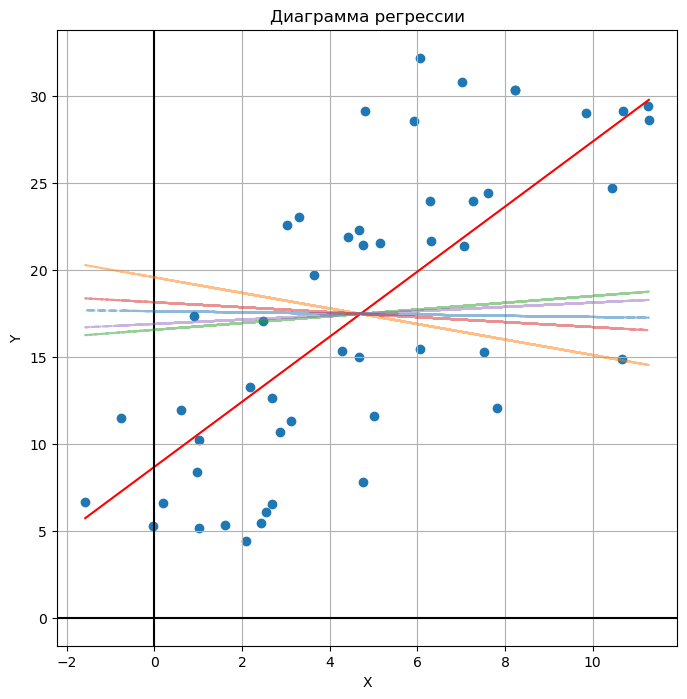

In [275]:
# данные

# линейная регрессия
slope, intercept, _, _, _ = scipy.stats.linregress(X, Y)

# построение диаграммы регрессии
fig = plt.figure(figsize=(8, 8))

plt.scatter(X, Y)
plt.plot(X, slope * np.array(X) + intercept, color='red')

plt.xlabel('X')
plt.ylabel('Y')
plt.title('Диаграмма регрессии')

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.grid()

# построение выборочных прямых
for i in range(5):
    sample_X = np.array(random.sample(X, len(X)))
    sample_Y = np.array(random.sample(Y, len(Y)))
    sample_slope, sample_intercept, _, _, _ = scipy.stats.linregress(sample_X, sample_Y)
    plt.plot(sample_X, sample_slope * sample_X + sample_intercept, linestyle='dashed', alpha=0.5)

plt.show()

Для негруппированных данных по найденным оценкам параметров линейной регрессии Y на x<br>
получить оценку s^2 для дисперсии ошибок наблюдений σ^2 , найти коэффициент детерминации R^2,<br>
построить доверительные интервалы для параметров регрессии a и b, дисперсии ошибок наблюдений σ^2 и<br>
среднего значения Y при x = x0.

Коэффициент детерминации равен:  1.0
Доверительный интервал параметра а: [1.2073, 1.3527]
Доверительный интервал параметра b: [0.8369, 1.4031]
Доверительный интервал параметра sigma^2: [0.0008, 0.0097]


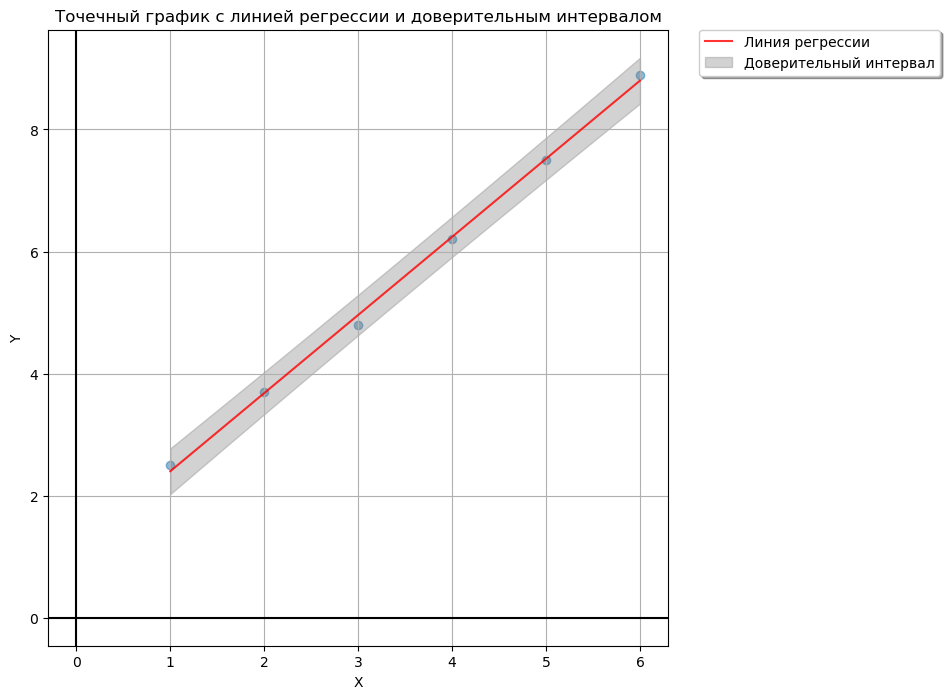

In [276]:
# задание данных
X = np.array([1, 2, 3, 4, 5, 6])
Y = np.array([2.5, 3.7, 4.8, 6.2, 7.5, 8.9])

# оценка параметров линейной регрессии
slope, intercept, r_value, p_value, std_err = linregress(X, Y)
a = slope
b = intercept

# Коэффициент детерминации (выборочный коэф. со знаком a)
R2 = np.sign(a) * scipy.stats.spearmanr(X, Y)[0]
print('Коэффициент детерминации равен: ', R2)

# построение диаграммы рассеивания
fig = plt.figure(figsize=(8, 8))
plt.scatter(X, Y, alpha=0.5)

# построение выборочной регрессионной прямой
X_range = np.linspace(min(X), max(X), 100)
Y_range = b + a * X_range
plt.plot(X_range, Y_range, color='red', alpha=0.8, label='Линия регрессии')

# оценка доверительного интервала для среднего значения Y
s2 = ((Y - (b + a * X))**2).sum() / (len(X) - 2)
se_Y = s2**0.5 * (1 + 1/len(X) + (X_range - X.mean())**2 / ((X - X.mean())**2).sum())**0.5
t_value = t.ppf(0.975, len(X) - 2)
Y_upper = Y_range + t_value * se_Y
Y_lower = Y_range - t_value * se_Y

# оценка доверительного интвервала парметра a
sx = np.std(X, ddof=1)
a_upper = round(a + t_value * np.sqrt(s2/((len(X) - 1) * sx**2)), 4)
a_lower = round(a - t_value * np.sqrt(s2/((len(X) - 1) * sx**2)), 4)

# оценка доверительного интвервала парметра b
b_upper = round(b + t_value * np.sqrt(s2 * (X**2).sum()/(len(X) * (len(X) - 1) * sx**2)), 4)
b_lower = round(b - t_value * np.sqrt(s2 * (X**2).sum()/(len(X) * (len(X) - 1) * sx**2)), 4)

# оценка доверительного интвервала парметра sigma^2
chi2_val1 = scipy.stats.chi2.ppf(1 - 0.05/2, df=len(X))
chi2_val2 = scipy.stats.chi2.ppf(0.05/2, df=len(X))
sigma2_lower = round((len(X) - 2) * s2 / (chi2_val1 * (len(X) - 2)), 4)
sigma2_upper = round((len(X) - 2) * s2 / (chi2_val2 * (len(X) - 2)), 4)

print(f'Доверительный интервал параметра а: [{a_lower}, {a_upper}]')
print(f'Доверительный интервал параметра b: [{b_lower}, {b_upper}]')
print(f'Доверительный интервал параметра sigma^2: [{sigma2_lower}, {sigma2_upper}]')

# построение доверительных интервалов для выборочных регрессионных прямых
plt.fill_between(X_range, Y_lower, Y_upper, color='gray', alpha=0.35, label='Доверительный интервал')

# настройка графика
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Точечный график с линией регрессии и доверительным интервалом')

plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')

plt.grid()

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left',
           borderaxespad=0.0, shadow=True)
plt.show()